In [2]:

import os
import torch
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModel, pipeline, AutoModelForSequenceClassification
import numpy as np
from datasets import Dataset, load_metric
import pandas as pd
from transformers import TextClassificationPipeline

In [33]:

model = AutoModelForSequenceClassification.from_pretrained('../../../Files/models/ROBERTA_base/Posts/Fully/checkpoint-43125')


In [34]:
model.to(1)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [35]:
model.device

device(type='cuda', index=1)

In [37]:
tokenizer.device

AttributeError: 'RobertaTokenizerFast' object has no attribute 'device'

In [40]:

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512, padding='max_length', truncation=True, add_special_tokens = True, return_tensors='pt')
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join('../../../Files/models/', args.model_dir))

classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=1)

In [3]:
test = pd.read_pickle('../../../Files/Submissions/train/test_split_submission_r.pickle')



In [4]:
test['textLen'] = test['cleanText'].apply(len)

In [7]:
length = test.textLen

In [13]:
length[length.values > 512]

5           850
812         554
901        1051
955         760
2229        552
           ... 
1407214    1186
1407317     813
1407428    3619
1407563     920
1407720     736
Name: textLen, Length: 6577, dtype: int64

In [14]:
6577 / len(length)

0.004671997635942203

<AxesSubplot:ylabel='Frequency'>

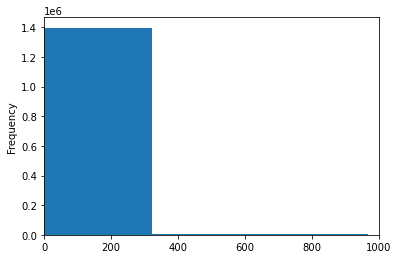

In [20]:
length.plot.hist(bins=100, xlim=(0,1000))

In [17]:
test['text'][1407428]

'ASTRA IN SANSKRIT \'EXTRAORDINARY WEAPON\', THEY \'KILL BOTH GENDERS\' NECA  The meaning of the major vaccine manufacturer brand Astrazeneca is quite clear when you break down the words.   \n\'Astra\' is Sanskrit (an ancient Indo-Aryan language, the sacred language of Hinduism) for \'extraordinary weapon\'. The term \'She\', according to the [Cambridge Dictionary](https://dictionary.cambridge.org/us/dictionary/english/ze) for the gender neutral word to replace \'he\' or \'she\' in English and thus refers to the end of the two genders. \'Neca\' comes from the Latin “neca ne neceris” (“to kill so as not to be killed”) and thus stands for murder.\n\nThat makes the meaning of the word Astrazeneca loosely translated: *extraordinary weapon to kill the two genders.*\n\nI\'ve been writing about vaccines for a while now. I did that before the coronavirus pandemic hit. I already predicted in 2014 that another pandemic would be staged, with the reason that vaccinations would be forced on the mas

In [50]:
test.plot.hist('textLen')

KeyboardInterrupt: 

In [5]:
tokens = tokenizer.batch_encode_plus(test.cleanText.values.tolist(), add_special_tokens=True, return_attention_mask=True, padding='longest', max_length=512, truncation=True, return_tensors='pt' )

In [42]:
testlist = []
for i,j in test.iterrows():
    testlist.append(j['cleanText'][0:512])

In [44]:
for i in testlist:
    print(len(i))

27
13
8
20
76
512
9
39
199
103
22
52
14
21
17
36
30
12
27
10
15
27
47
45
65
19
17
22
414
3
20
14
25
7
6
87
38
17
12
53
3
15
11
15
23
18
179
14
12
54
9
23
35
8
11
46
39
10
10
2
42
9
28
1
13
40
18
18
44
18
22
13
21
12
10
10
4
59
97
20
72
12
24
9
9
27
14
30
57
40
25
22
33
9
30
27
65
107
13
26
92
36
7
54
21
9
9
30
49
11
10
33
9
21
10
18
12
17
46
16
13
12
15
92
8
5
30
124
62
21
25
52
26
20
1
20
33
20
18
38
23
11
16
0
11
67
13
34
1
39
25
4
18
53
29
19
42
12
55
12
62
42
5
67
14
53
16
30
17
5
42
48
26
21
17
12
10
14
12
60
30
112
9
27
82
18
40
31
42
11
29
11
11
49
77
7
41
11
1
15
22
23
68
40
4
38
36
25
16
9
75
19
55
348
3
21
42
9
25
5
12
30
10
17
9
17
22
103
108
54
18
16
21
21
89
66
75
42
15
11
46
26
489
17
72
45
25
106
14
35
70
36
11
141
35
22
4
10
15
19
44
9
28
22
14
20
22
6
94
14
21
12
4
56
41
19
33
5
44
6
36
8
46
73
21
4
53
1
20
13
20
23
18
32
7
26
20
25
15
31
6
20
17
27
25
23
66
0
42
512
30
110
8
8
24
28
51
8
28
20
24
15
38
8
13
18
3
10
37
27
28
53
27
13
4
12
23
7
17
17
37
32
20
35
1
6
29


KeyboardInterrupt: 

In [45]:
testlist[5]

'pfizer previous history myocarditispericarditis want positive   finally fully vaccinate japan vaccine rollout slow bureaucracy feel anxious vaccine protect bit \n\n medical history autoimmune disease previously cause damage heart m remission treat chemo maintenance medication hydroxychloroquine steroid flair near constant chest pain tightness symptom come type illness especially careful year covid come close contact individual \n\n sore arm [ NUM ] hour slight fever second fine day troponin lab second normal us'

In [15]:
classifier = TextClassificationPipeline(model=model, device=1)

In [39]:
batch = tuple(t.to(1) for t in tokens)

AttributeError: 'str' object has no attribute 'to'

In [36]:
resuls = model(**tokens)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:1 and cpu! (when checking argument for argument index in method wrapper__index_select)

In [46]:
results = classifier(testlist[0:5000])

In [47]:
results

[{'label': 'LABEL_1', 'score': 0.9955306649208069},
 {'label': 'LABEL_1', 'score': 0.9955294728279114},
 {'label': 'LABEL_1', 'score': 0.994838297367096},
 {'label': 'LABEL_1', 'score': 0.9955246448516846},
 {'label': 'LABEL_0', 'score': 0.9849889278411865},
 {'label': 'LABEL_2', 'score': 0.9805868864059448},
 {'label': 'LABEL_1', 'score': 0.9138021469116211},
 {'label': 'LABEL_1', 'score': 0.9934065341949463},
 {'label': 'LABEL_2', 'score': 0.9208515882492065},
 {'label': 'LABEL_1', 'score': 0.995159924030304},
 {'label': 'LABEL_1', 'score': 0.9955143332481384},
 {'label': 'LABEL_1', 'score': 0.9954193830490112},
 {'label': 'LABEL_1', 'score': 0.833211362361908},
 {'label': 'LABEL_1', 'score': 0.9954127669334412},
 {'label': 'LABEL_1', 'score': 0.9934199452400208},
 {'label': 'LABEL_1', 'score': 0.9955339431762695},
 {'label': 'LABEL_1', 'score': 0.9955441355705261},
 {'label': 'LABEL_1', 'score': 0.9187488555908203},
 {'label': 'LABEL_1', 'score': 0.9926875829696655},
 {'label': 'LAB

In [13]:
model_name = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name, padding="max_length", truncation=True)

def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

In [14]:
model = AutoModelForSequenceClassification.from_pretrained('../../../Files/models/bert_base_cased_model/fully_trained/checkpoint-3237/')

In [31]:
dirs = 'Submissions/train/test_split_submission_r.pickle'

In [35]:
try: 
    files = os.listdir(os.path.join('../../../Files/', dirs))

    # remove any files that are not in the .pickle type 
    files = [f for f in files if f.endswith('.pickle')]
except FileNotFoundError:
    file = [dirs.split('/')[-1]]

In [4]:
df = pd.read_pickle('../../../Files/Submissions/train/test_split_submission_r.pickle')

In [5]:
df.head()

author  created_utc      id  num_comments  \
0         Future_Khai   1606789344  k4bf5n             2   
1             Plotz50   1610128980  kt7wgq             6   
2  LegacyOfDepression   1608036052  kdl0qb             3   
3    bejandianaandrei   1606611545  k2zqd5             0   
4           Naiiqiqhq   1609656203  kpfnra             1   

                                           permalink  score  \
0  /r/aww/comments/k4bf5n/just_my_dog_hanging_wit...      1   
1         /r/aww/comments/kt7wgq/cat_in_a_colosseum/      9   
2        /r/aww/comments/kdl0qb/do_it_ike_last_kiss/      1   
3  /r/aww/comments/k2zqd5/whats_the_best_thing_af...      1   
4  /r/NoNewNormal/comments/kpfnra/how_the_fuck_do...      1   

                                            selftext    subreddit  \
0                                                             aww   
1                                                             aww   
2                                                             aww   
3                                                             aww   
4  Why the fuck are you required to use mask on s...  NoNewNormal   

                                               title  \
0  Just my dog hanging with his bros, Happy Howli...   
1                                 Cat in a colosseum   
2                               Do it ike last kiss.   
3     what's the best thing after a nap? another nap   
4            How the fuck does all this make sense ?   

                                                 url  label  \
0                    https://i.imgur.com/vLNjOSH.jpg      1   
1                https://i.redd.it/euajbbxle5a61.jpg      1   
2                https://i.redd.it/0y2ifp79jc561.jpg      1   
3                    https://v.redd.it/ymlbr0n9v2261      1   
4  https://www.reddit.com/r/NoNewNormal/comments/...      0   

                                                text  \
0  Just my dog hanging with his bros, Happy Howli...   
1                                Cat in a colosseum    
2                              Do it ike last kiss.    
3    what's the best thing after a nap? another nap    
4  How the fuck does all this make sense ? Why th...   

                                           cleanText  
0                        dog hang bro happy howliday  
1                                      cat colosseum  
2                                           ike kiss  
3                               s good thing nap nap  
4  fuck sense   fuck require use mask place place...

In [15]:
from transformers import TextClassificationPipeline

In [16]:
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [50]:
results = classifier(testlist[:100], top_k=2)

In [9]:
results[0]

[{'label': 'LABEL_1', 'score': 0.9958221912384033},
 {'label': 'LABEL_2', 'score': 0.00371171603910625},
 {'label': 'LABEL_0', 'score': 0.00046611326979473233}]

In [10]:
for i, j in test2.iterrows():
    test2.at[i, 'pred_1'] = np.int64(results[i][0]['label'][-1])
    test2.at[i, 'conf_1'] = results[i][0]['score']
    test2.at[i, 'pred_2'] = np.int64(results[i][1]['label'][-1])
    test2.at[i, 'conf_2'] = results[i][1]['score']

/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.at[i, 'pred_1'] = np.int64(results[i][0]['label'][-1])
/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.at[i, 'conf_1'] = results[i][0]['score']
/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [17]:
test2.loc[ test['label'] == 1, 'label'] = 4
test2.loc[ test['label'] == 0, 'label'] = 1
test.loc[ test['label'] == 4, 'label'] = 0

In [14]:
import pandas as pd
import xgboost as xbg
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_results(y_test, y_pred, model ):
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    y_pred_onehot = pd.get_dummies(y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_onehot, multi_class='ovo')
    print('Model performance for {model}'.format(model=model))
    print('------------------------------------------------')
    print('Accuracy is ', acc)
    print('F1 is ', f1)
    print('ROC AUC Score is ', roc_auc)
    print('------------------------------------------------')

    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    df = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
    df2 = df.div(df.sum(axis=1), axis=0)
    ax = sns.heatmap(df2)
    ax.set(xlabel='Predicted', ylabel='Actual', title=f'Confusion Matrix for {model}')
    plt.show()

Model performance for BERT
------------------------------------------------
Accuracy is  0.7
F1 is  0.6606848628125224
ROC AUC Score is  0.7680436117936118
------------------------------------------------


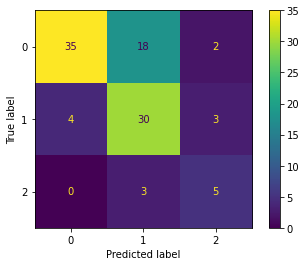

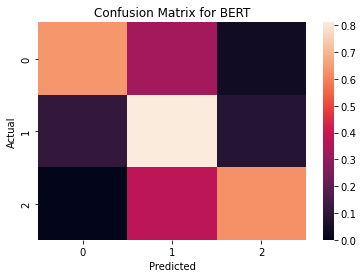

In [18]:
plot_results(test2['label'], test2['pred_1'], 'BERT')

### SLOW WAY, don't look here

In [66]:
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(test))):
    predictions.append(classifier(test[i]))

  0%|          | 3500/1408474 [04:49<32:17:12, 12.09it/s] 


KeyboardInterrupt: 